In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('df_finalized.csv')
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,income_category,loan_category,Interest_Rate_Category(%),age_group,employment_duration_bucket,cred_hist_bucket
0,2.0,21,9600,OWN,5.0,EDUCATION,A,1000,11.14,1,NEW,2,NO DEFAULT,"$0 - $20,000","$0 - $5,000",9.01 - 13,18 - 24,6 - 10,0 - 5
1,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,5500,12.87,5,N,3,DEFAULT,"$0 - $20,000","$5,001 - $10,000",9.01 - 13,25 - 34,0 - 5,0 - 5
2,6.0,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,N,2,DEFAULT,"$0 - $20,000","$0 - $5,000",5 - 9,18 - 24,0 - 5,0 - 5
3,10.0,21,10000,OWN,6.0,VENTURE,C,1600,14.74,1,N,3,DEFAULT,"$0 - $20,000","$0 - $5,000",13.01 - 17,18 - 24,6 - 10,0 - 5
4,12.0,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,N,2,DEFAULT,"$0 - $20,000","$0 - $5,000",5 - 9,18 - 24,0 - 5,0 - 5


# Age Distribution: This graph shows the age range of applicants and helps identify which age groups are most likely to apply for loans.

C:\Users\amid1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


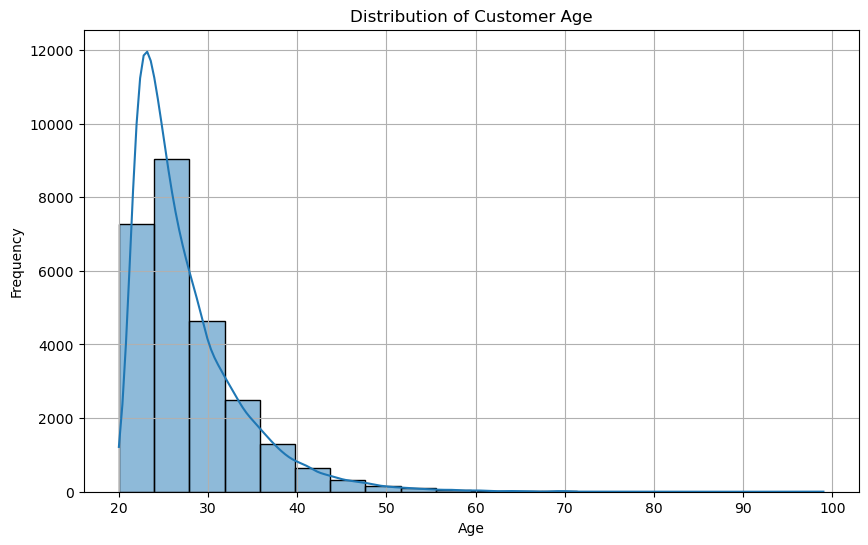

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['customer_age'], bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()


# Income Distribution: The box plot highlights income ranges, showcasing typical income levels and potential outliers.

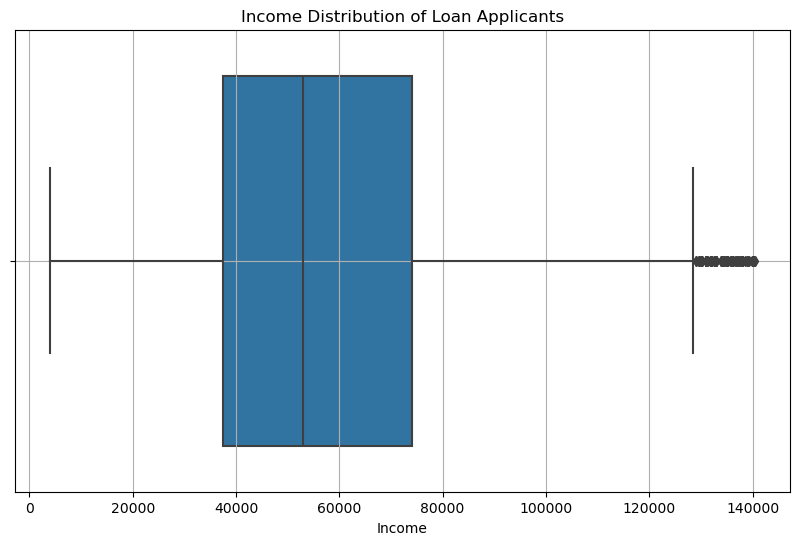

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['customer_income'])
plt.title('Income Distribution of Loan Applicants')
plt.xlabel('Income')
plt.grid()
plt.show()


# Home Ownership vs Loan Acceptance: This count plot illustrates the relationship between home ownership and historical defaults, informing potential risk factors for loan acceptance.

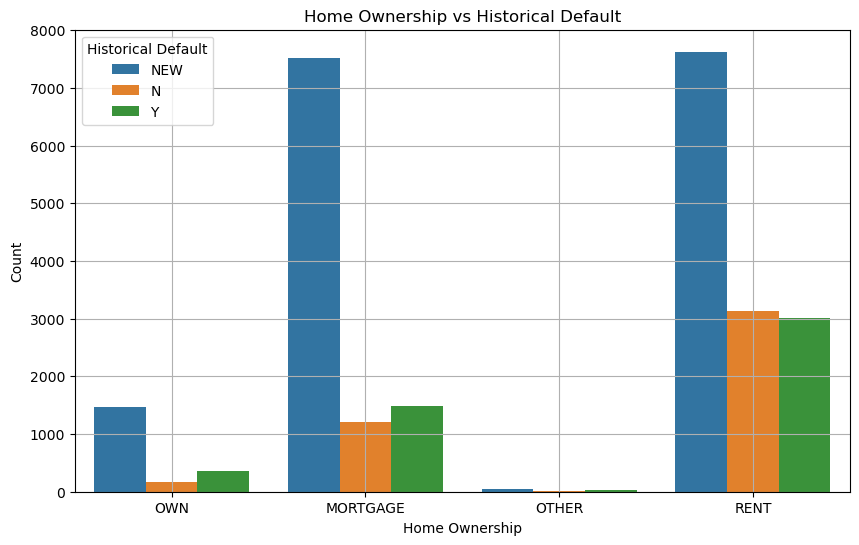

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', data=df, hue='historical_default')
plt.title('Home Ownership vs Historical Default')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Historical Default')
plt.grid()
plt.show()

# Average Income by Employment Duration: This bar plot reveals how income varies with employment duration, indicating stability and earning potential.

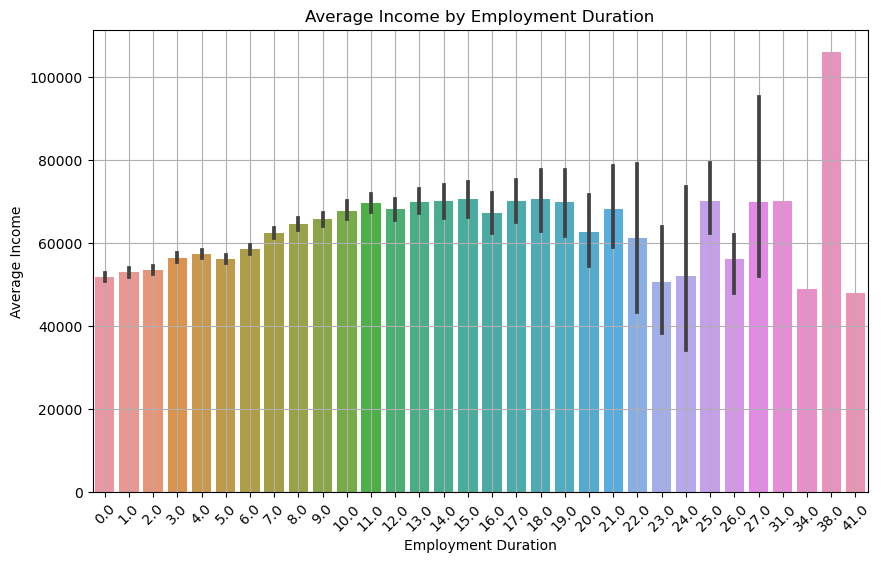

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x='employment_duration', y='customer_income', data=df)
plt.title('Average Income by Employment Duration')
plt.xlabel('Employment Duration')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Age Group Proportions: The pie chart helps visualize the demographic spread of age groups, assisting in targeting specific segments.

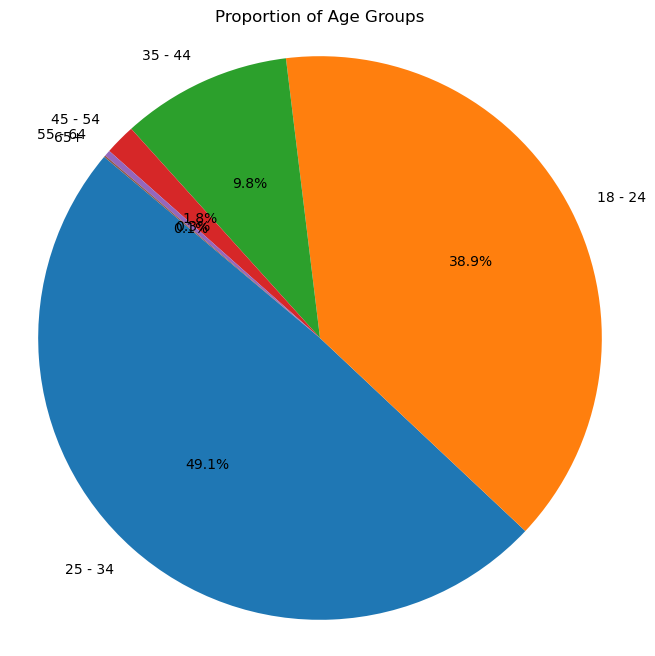

In [7]:
age_group_counts = df['age_group'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Age Groups')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Count of Loan Applicants by Income Category: This count plot provides insights into how many people fall into each income category, guiding the bank's loan policies.

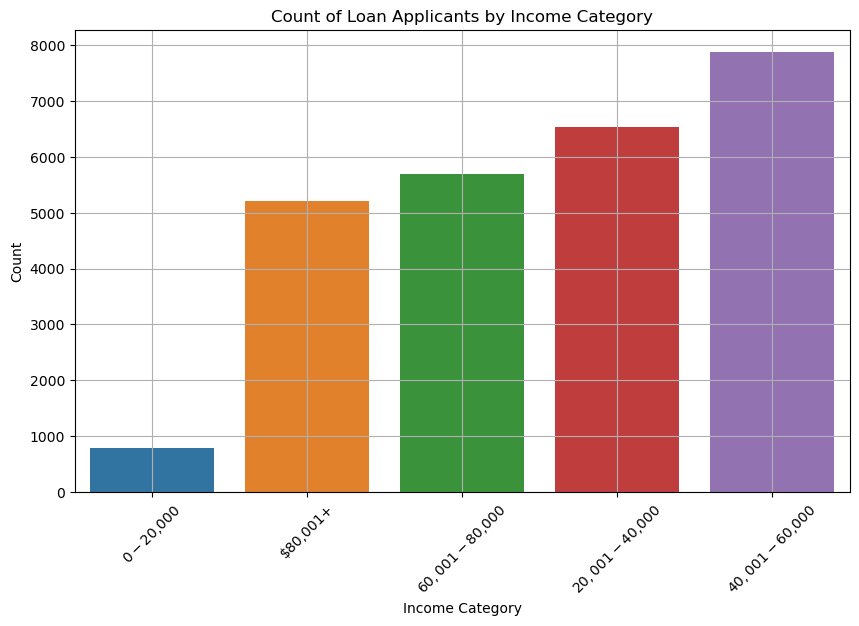

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='income_category', data=df)
plt.title('Count of Loan Applicants by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Correlation Heatmap: This visual helps identify strong relationships between variables. For example, a strong positive correlation between income and credit history length may suggest that higher income leads to better credit history.

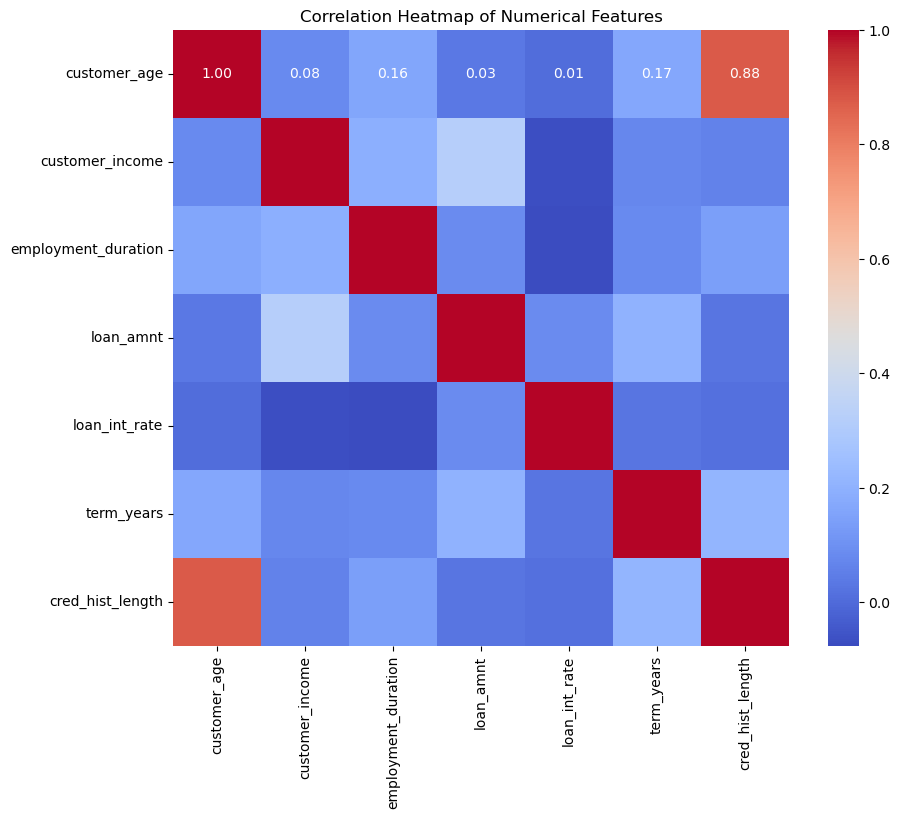

In [9]:
# Select only numeric columns, excluding 'customer_id'
numeric_df = df.drop(columns=['customer_id']).select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Employment Duration vs Historical Default: The stacked bar chart shows how the historical default rate varies with employment duration. A lower default rate among those with longer employment durations may indicate that job stability correlates with better loan repayment ability.

<Figure size 1000x600 with 0 Axes>

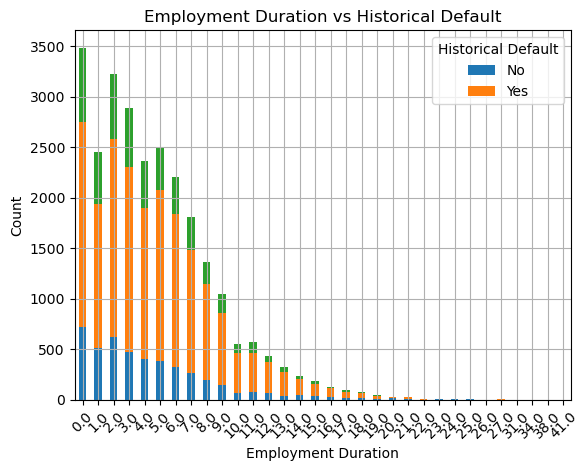

In [10]:
plt.figure(figsize=(10, 6))
employment_default_counts = df.groupby(['employment_duration', 'historical_default']).size().unstack()
employment_default_counts.plot(kind='bar', stacked=True)
plt.title('Employment Duration vs Historical Default')
plt.xlabel('Employment Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Historical Default', labels=['No', 'Yes'])
plt.grid()
plt.show()

# Income Distribution by Age Group: The box plot illustrates how income levels differ across age groups. It can reveal whether certain age demographics tend to earn more or less, influencing loan eligibility.

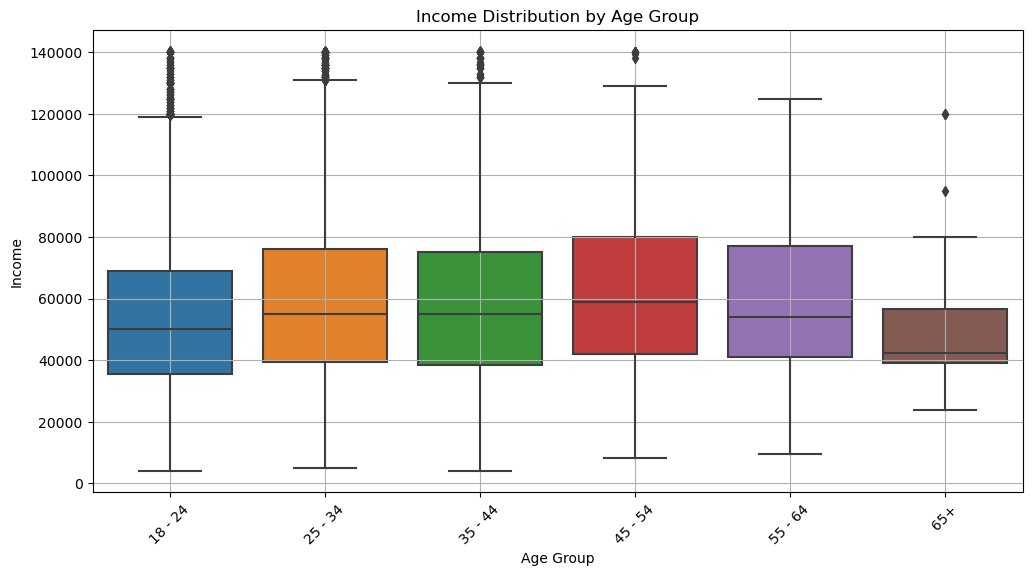

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='customer_income', data=df)
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Count of Loan Applicants by Employment Duration: This count plot provides insights into the job stability of applicants. A higher number of applicants in the "long-term" category may suggest a more stable borrowing population.

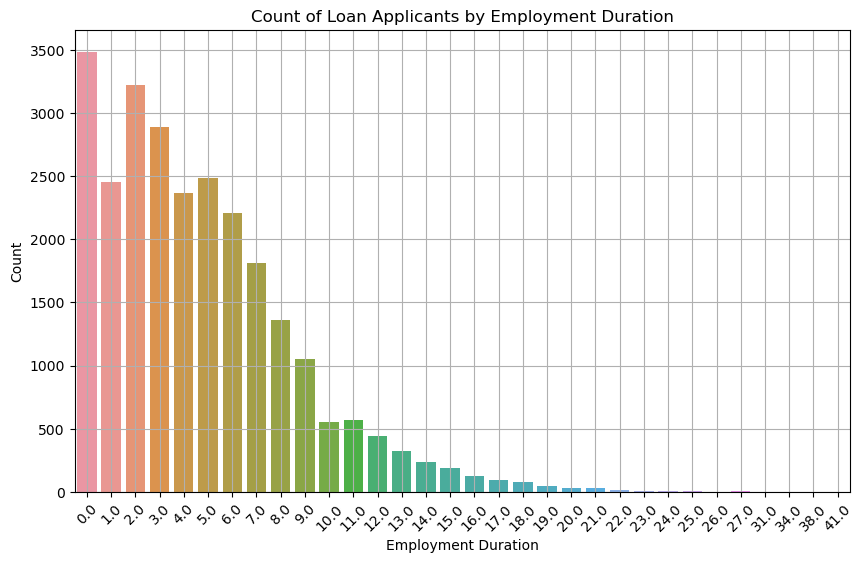

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='employment_duration', data=df)
plt.title('Count of Loan Applicants by Employment Duration')
plt.xlabel('Employment Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()